In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m
import scipy.linalg as la
import scipy.sparse.linalg as sla

### Моделирование волновых движений
В предыдущем разделе мы обнаружили, что в системе из $N$ связанных осцилляторов колебания отдельных тел приводят к распространению энергии вдоль цепочки на произвольные расстояния. Данный факт указывает на аналогию между колебанием цепочки связанных осцилляторов и волнами, распространяющимися в непрерывных средах. Для того чтобы осуществить переход от колебаний дискретной цепочки осцилляторов массой $m$, связанных пружинками одинаковой жесткости $k$, длина которых в равновесном состоянии равна $a$, к волновому движению непрерывной среды рассмотрим уравнение движения $i$-го тела:

$$\tag{1} \frac{d^2u_i}{dt^2} = −\frac{k}{m}(2u_i − u_{i+1} − u_{i−1}),\ i = 2, 3, . . . ,N − 2,$$

где $u_i$ - смещение $i$-го тела относительно положения равновесия.

При $N → ∞, a → 0$ и постоянной длине цепочки можно заменить в *(1)* $u_i(t)$, где $i$-дискретная переменная на функцию $u(x, t)$, $х$ - непрерывная переменная. Данная замена позволяет записать *(1)* в следующем виде:

$$\tag{2} \frac{\partial^2 u(x, t)}{\partial t^2} = \frac{ka^2}{m}\frac{1}{a^2}[u (x + a, t) − 2u (x, t) + u (x − a, t)]$$

Разложив функцию $u(x, t)$ в ряд Тэйлора в точках $x ± a$:

$$ u (x ± a, t) = u(x, t) ± a\frac{∂u}{∂x} + \frac{a^2}{2}\frac{∂^2u}{∂x^2} + . . .$$

и подставив в *(2)*, получим

$$ \tag{3} \frac{∂^{2.}u (x, t)}{∂t^2} = \frac{ka^2}{m}\frac{∂^2u}{∂x^2}.$$

Вводя обозначения $μ = m/a, T = k/a$ ($T$ - натяжение, $m$ - линейная плотность
массы), $v_2 = T/μ$, запишем *(3)* в следующем виде:

$$ \tag{4} \frac{∂^2u(x, t)}{∂t^2} = \frac{1}{v^2}\frac{∂^2u}{∂x^2}. $$

Уравнение *(4)* называется волновым уравнением. Непосредственной подстановкой в *(4)* легко убедиться в том, что любые функции вида $f(x − vt), f(x + vt)$ являются его решениями. При этом на прямых, определяемых уравнениями $x ± vt = const$, решения уравнения остаются постоянными. Так как волновое уравнение *(4)* является линейным, решения волнового уравнения удовлетворяют принципу суперпозиции, то есть любая функция вида

$$\tag{5} ψ (x, t) = Σ^N_{i=1}[f_i (x − vt) + f_i (x + vt)] $$

также является решением волнового уравнения *(4)*.

Следовательно, поведение волны произвольной формы можно описать, представляя ее в виде набора синусоидальных волн (ряда Фурье). Данный подход мы используем в дальнейшем для анализа движения волнового пакета в среде с дисперсией.

Анализ особенностей решений волнового уравнения, следуя выбранному в нашей книге подходу, будем проводить численно. Для описания эволюции решений волнового уравнения в Python в качестве первого шага необходимо создать три функции:

- функция ***Wave***, описывающая решение волнового уравнения в момент времени $t = 0$;
- функция ***WaveP***, описывающая волну, распространяющуюся в положительном направлении оси *OX*;
- функция ***WaveN***, описывающая волну, распространяющуюся в отрицательном направлении оси *OX*.

Ниже приведены листинги каждой из упомянутых выше функций.

In [2]:
def Wave(A, x):
    return A*np.exp(-x**2/4)

def WaveP(A, x, v, t):
    return Wave(A, x-v*t)

def WaveN(A, x, v, t):
    return Wave(A, x+v*t)

Далее для вычисления значений соответствующих функций и визуализации решений волнового уравнения необходимо выполнить следующую последовательность:

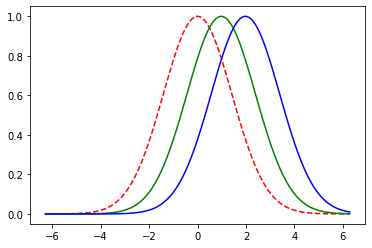

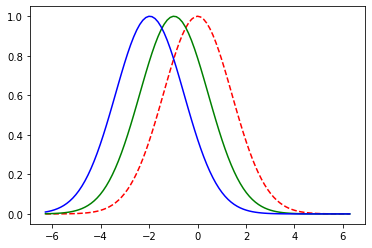

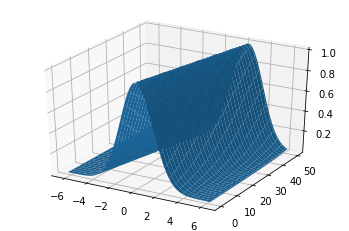

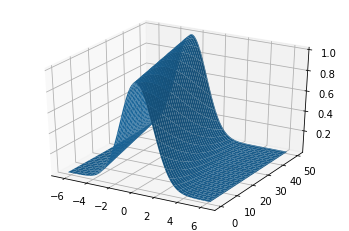

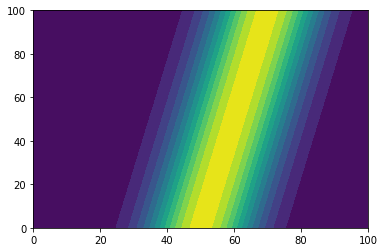

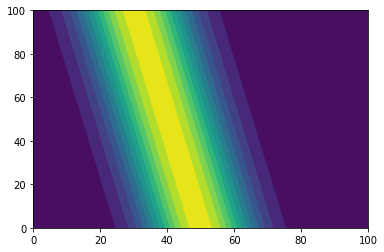

In [3]:
x_min = -2*np.pi
x_max = 2*np.pi
Nx = 101

x = []

for i in range(Nx):
    x.append(x_min + (x_max - x_min)/(Nx-1)*(i))
    
t_min = 0
t_max = 50
v = 0.05
Nt = 101

t = []

for j in range(Nt):
    t.append(t_min + ((t_max - t_min)/(Nt - 1))*(j))
    
M1 = np.zeros((Nt, Nx), dtype=np.float64)
M2 = np.zeros((Nt, Nx), dtype=np.float64)

for i in range(Nt):
    for j in range(Nx):
        M1[i, j] = WaveP(1, x[j], v, t[i])
        M2[i, j] = WaveN(1, x[j], v, t[i])
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(x, M1[0,:],'r--', x, M1[39,:],'g', x, M1[79,:],'b')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(x, M2[0,:],'r--', x, M2[39,:],'g', x, M2[79,:],'b')

X, Y = np.meshgrid(x, t)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
p3 = ax3.plot_surface(X, Y, M1)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
p4 = ax4.plot_surface(X, Y, M2)

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
p5 = ax5.contourf(M1, 15)

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
p6 = ax6.contourf(M2, 15)

**Рис. 1. Функция $u_p(x, t)$ в фиксированные моменты времени $t = 0, 40, 80$**

**Рис. 2. Функция $u_n(x, t)$ в фиксированные моменты времени $t = 0, 40, 80$**

**Рис. 3. Поверхность, описываемая функцией $u_p(x, t)$**

**Рис. 4. Поверхность, описываемая функцией $u_n(x, t)$**

**Рис. 5. Карта линий уровня функции $u_p(x, t)$**

**Рис. 6. Карта линий уровня функции $u_n(x, t)$**

Результаты выполнения приведенной выше последовательности команд представлены на *рис. 1-6*.

Как видно из *рис. 1-6*, функции $u_p(x, t), u_n(x, t)$ описывают волны, распространяющиеся соответственно в положительном и отрицательных направлениях оси *OX*. (Такие волны называются бегущими.) Отметим, что форма данных волн во времени остается неизменной.

### Задание:
#### Замените в описанном выше документе функцию
$$exp(−x^2/2)$$

#### функцией

$$cos(2π/λ\cdot x) $$

- Проанализируйте поведение решений волнового уравнения для различных значений $λ$.
- Рассмотрите решение волнового уравнения при $t = 0$ - функцию $u(x, 0)$. Чему равен период функции $u(x, 0)$, называемый длиной волны?
- Рассмотрите решение волнового уравнения при $x = 0$ - функцию $u(0, t)$. Чему равен период функции $u(0, t)$, называемый периодом волны?
- Убедитесь в том, что отношение периода функции $u(x, 0)$ к периоду функции $u(0, t)$ равно скорости распространения волны $v$.

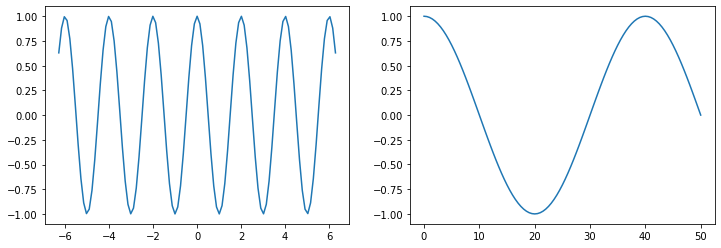

период T1 функции u1=u(x,0) равен 2.0
период T2 u2=u(0,t) равен 40.0
T1/T2 = v ? True


In [4]:
def Wave(A, x):
    global Lambda
    return A*np.cos(2*m.pi*x/Lambda)

def WaveP(A, x, v, t):
    return Wave(A, x-v*t)

def WaveN(A, x, v, t):
    return Wave(A, x+v*t)

def period(y, x, eps=0.001):
    for i in range(1, len(y)):
        if y[0] - eps <= y[i] <= y[0] + eps:
            return x[i] - x[0]
    return None

Lambda = 2 

x_min = -2*np.pi
x_max = 2*np.pi
Nx = 101

x = np.linspace(x_min, x_max, Nx)
u1 = np.zeros(Nx)
for i in range(Nx):
    u1[i] = WaveP(1, x[i], v, 0)
T1 = round(period(u1, x, 0.07))

t_min = 0
t_max = 50
v = 0.05
Nt = 101

t = np.linspace(t_min, t_max, Nt)
u2 = np.zeros(Nt)
for i in range(Nt):
    u2[i] = WaveP(1, 0, v, t[i]) 
T2 = round(period(u2, t))

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[12, 4])
ax[0].plot(x, u1)
ax[1].plot(t, u2)

plt.show()
print(f"период T1 функции u1=u(x,0) равен {T1}\nпериод T2 u2=u(0,t) равен {T2}")
print(f"T1/T2 = v ? {T1/T2 == v}")

### Моделирование влений интерференции и дифракции
Под явлением интерференции понимают сложение волн, приходящих по отдельности от одного и того же точечного источника, либо волн, испущенных двумя точечными источниками и имеющих одинаковую частоту и постоянную разность фаз. Классическим примером интерференции световых волн является опыт Юнга с двойной щелью, схема которого представлена на *рис. 7*.

<img src="images/yung.png"/>

**Рис. 7. Схема опыта Юнга**

Источник света $S$, излучающий свет только одной частоты (монохроматический источник), помещен на одинаковом расстоянии от двух одинаковых отверстий, имеющих координаты $(0, 0,−d/2), (0, 0, d/2)$ соответственно. При этом размеры отверстий таковы, что их можно считать точечными источниками света, излучающими волны с одинаковой частотой и фазой (когерентные источники). На расстоянии $L$ от точки с координатами $(0, 0, 0)$ расположен экран, на котором наблюдается распределение интенсивности волны, являющейся результатом интерференции волн, излученных когерентными точечными источниками. Для ответа на вопрос, какая картина будет наблюдаться на экране, получим выражение, описывающее распределение интенсивности света от двух точечных источников. Электромагнитная волна, излучаемая монохроматическим источником света, является сферической волной. Напряженность электрического поля $E(r, t)$ в точке, удаленной от источника на расстояние $r$, определяется следующим выражением:

$$\tag{6} E (r, t) =\frac{A}{r}cos (kr − ωt + φ) ,$$

где $A$ - амплитуда волны, $φ$ - начальная фаза волны, которую далее для когерентных источников будем полагать равной нулю.
Множитель $1/r$ отражает тот факт, что интенсивность света убывает с увеличением расстояния между источником и точкой наблюдения. Из принципа суперпозиции известно, что полное электрическое поле, создаваемое двумя источниками в точке P, равно

$$\tag{7} E(t) = E_1 + E_2 = \frac{A}{r_1}cos (kr_1 − ωt) + \frac{A}{r_2}cos (kr_2 − ωt) .$$

Напряженность электрического поля в точке $P$, создаваемого $N$ источниками света, положение которых в пространстве относительно системы координат XOY задано их радиусами-векторами $\vec{R_i}, i = 0, 1, . . . ,N − 1$, определяется по формуле

$$\tag{8} E(t, \vec{r})=\sum^{N-1}_{i=0}\frac{A}{|\vec{r}-\vec{R}_i|}cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}-\vec{R}_i|-\omega t\Bigg)$$

где $\vec{r}$ - радиус-вектор точки наблюдения.

Наблюдаемая интенсивность волны $I$ в точке $P$ равна

$$\tag{9} I =< E^2 >,$$

где угловые скобки $< >$ означают усреднение по времени:

$$\tag {10} ⟨E^2⟩=\frac{1}{T}∫^T_0E(r, t)^2dt.$$

Для вычисления среднего оказывается удобным преобразовать *(10)* следующим
образом, поскольку в соответствии с *(6)*

$$E = E(r, ωt) = E(r,\frac{2π}{T}t),$$

то можно ввести безразмерную переменную $ξ = t/T$ и записать интеграл *(10)* в следующем виде:

$$\tag{11} <E^2>=\int_0^1E(r, \xi)^2d\xi=\int_0^1\Bigg(\sum^{N-1}_{i=0}\frac{A}{|\vec{r} - \vec{R}_i|}cos\Bigg(\frac{2\pi}{\lambda}|\vec{r} - \vec{R}_i| - 2\pi\xi\Bigg)\Bigg)^2d\xi$$

Вычисление интеграла в *(11)* для произвольного количества источников не встречает принципиальных трудностей, однако получающиеся в результате выражения оказываются весьма громоздкими, и для их анализа приходится использовать ПК. В этих условиях представляется оправданным проводить вычисления интенсивности в соответствии с *(11)* сразу в численном виде. Алгоритм решения данной задачи достаточно очевиден:

- Задать функцию, описывающую интенсивность световой волны, в соответствии с *(11)*.
- Задать количество источников света и длину излучаемой световой волны.
- Задать расположение источников света (набор векторов $\vec{R}_i, i = 0, 1, . . . ,N −1$).
- Задать пространственную сетку, в узлах которой производится вычисление интенсивности световой волны.

Реализация описанного алгоритма осуществляется в Python следующей последовательностью действий:

- Cоздание функции **Intensity**, возвращающей значение интенсивности в заданной точке пространства в соответствии с *(11)*. Ниже представлен листинг данной функции.

In [5]:
def Intensity(Lambda, N, A, R0, r):
    su = 0
    ksi = np.linspace(0, 1, 1000)
    Ni = len(ksi)
    Rr= np.zeros(N, dtype=np.float64)
    
    f = np.zeros(Ni, dtype=np.float64)
    
    for i in range(N):
        Rr[i] = np.linalg.norm(r - R0[:,i])
        
    for i in range(Ni):
        su = 0
        
        for j in range(N):
            su += (A[j]/Rr[j]*np.cos(2*np.pi/Lambda*Rr[j]-2*np.pi*ksi[i]))
        f[i] = su**2
        
    return np.trapz(f, ksi)

- Выполнение следующей последовательности команд:

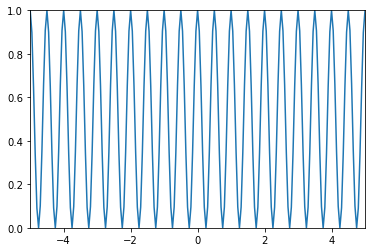

In [6]:
N = 2
A = [1, 1]
Lambda = 5e-4

R0 = np.array([[0, 0, -0.1]])
R1 = np.array([[0, 0, 0.1]])

R = np.concatenate((R0.T, R1.T), 1)

Np = 201
z_min = -5
z_max = 5

z = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)
    
L = 200
I = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    I[i] = Intensity(Lambda, N, A, R, r)
    
Imax = np.amax(I)
fig7 = plt.figure()
ax7 = fig7.add_subplot(111)
ax7.set_xlim(-5, 5)
ax7.set_ylim(0, 1)
p7 = ax7.plot(z, I/Imax)

**Рис. 8. Распределение интенсивности световой волны на отрезке $x = 0, y = L, z ∈ [z min, z max]$**

Результаты выполнения описанной выше последовательности команд представлены на *рис. 8*.

Как показывает практика работы с данными функциями, на вычисление интеграла *(11)* даже вдоль одной прямой Python требуется достаточно большое количество времени, которое, как очевидно, будет в $Np$ раз больше при анализе распределения интенсивности на плоскости $y = L$. Можно устранить отмеченный недостаток, если вместо вычисления интеграла *(11)* проводить усреднение напряженности суммарного электрического поля по конечному числу точек интервала $[0, 1]$. Функция, реализующая данное усреднение, имеет следующий вид:

$$\tag{12} E_1(λ, A,N,R_0, r,Nb) = \frac{1}{Nb}\sum^{Nb}_{j=1}\Bigg(\sum^{N}_{i=1}\frac{A}{|r − R_{0_i}|}cos\Bigg(\frac{2π}{λ}|r − R_{0_i}| − \frac{2π}{Nb}j\Bigg)\Bigg)^2, $$

здесь $λ$ - длина волны, $A$ - амплитуда волны, $N$ - количество источников света, $R_0$ - составной массив, содержащий радиусы-векторы источников света, $r$ - радиус-вектор точки наблюдения, $N_b$ - число точек усреднения.

Для реализации вычислений в соответствие с *(12)* необходимо создать соответствующую функцию **Intensity1**:

In [7]:
def Intensity1(Lambda, N, A, R0, r, Nb):
    
    Rr= np.zeros(N, dtype=np.float64)
    f = np.zeros(Nb, dtype=np.float64)
    
    for i in range(N):
        Rr[i] = np.linalg.norm(r - R0[:,i])
        
    for i in range(Nb):
        su = 0
        
        for j in range(N):
            su += (A[j]/Rr[j]*np.cos(2*np.pi/Lambda*Rr[j]-2*np.pi/Nb*i))
        f[i] = su**2
        
    return np.mean(f)

Для вычисления распределения интенсивности в соответствии с *(12)* необходимо
выполнить следующую последовательность команд:

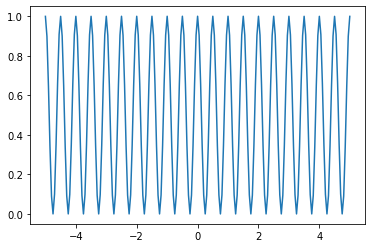

In [8]:
N = 2
A = [1, 1]
Lambda = 5e-4

R0 = np.array([[0, 0, -0.1]])
R1 = np.array([[0, 0, 0.1]])

R = np.concatenate((R0.T, R1.T), 1)

Np = 201
z_min = -5
z_max = 5

z = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)
    
L = 200
Nb = 3
I1 = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    I1[i] = Intensity1(Lambda, N, A, R, r, Nb)
    
I1max = np.amax(I1)
fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
p8 = ax8.plot(z, I1/I1max)

**Рис. 9. Распределение интенсивности световой волны на отрезке $x = 0, y = L, z ∈ [z min, z max]$**

Анализ разности между значениями распределений интенсивностей $I, I_1$, вычисленными на отрезке $x = 0, y = L, z ∈ [z min, z max]$, показывает, что уже при усреднении по трем точкам абсолютное значение разности не превосходит $10^{−10}$, поэтому далее при решении задач следует использовать функцию **Intensity1**.

Для анализа пространственного распределения интенсивности необходимо выполнить следующую последовательность команд:

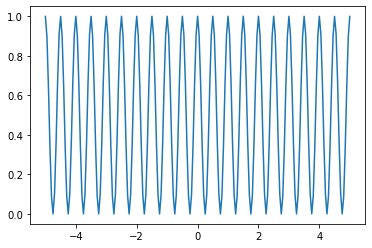

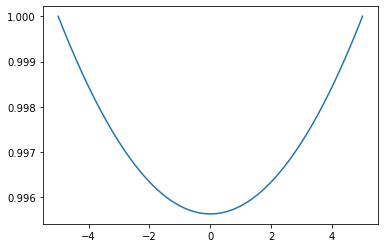

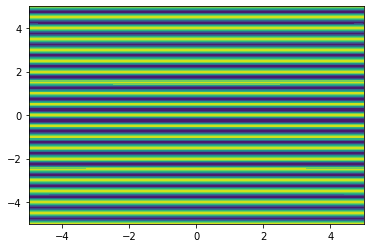

In [9]:
N = 2
A = [1, 1]
Lambda = 5e-4

R0 = np.array([[0, 0, -0.1]])
R1 = np.array([[0, 0, 0.1]])

R = np.concatenate((R0.T, R1.T), 1)
Np = 201

x_min = -5
x_max = 5

x = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    x[i] = x_min + (x_max - x_min)/(Np - 1)*(i)

z_min = -5
z_max = 5

z = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)
    
L = 200
Nb = 3
I2 = np.zeros((Np, Np), dtype=np.float64)

for i in range(Np):
    for j in range(Np):
        r = np.array([x[j], L, z[i]]).T
        I2[i, j] = Intensity1(Lambda, N, A, R, r, Nb)

fig9 = plt.figure()
ax9 = fig9.add_subplot(111)
p9 = ax9.plot(z, I2[:, 19]/np.amax(I2[:, 19]))


fig10 = plt.figure()
ax10 = fig10.add_subplot(111)
p10 = ax10.plot(z, I2[19, :]/np.amax(I2[19, :]))

X,Z = np.meshgrid(x, z)

fig11 = plt.figure()
ax11 = fig11.add_subplot(111)
ax11.set_xlim(-5, 5)
p11 = ax11.contourf(X, Z, I2)

**Рис. 10. Распределение интенсивности освещенности световой волны на отрезке $x = −4, 0452, y = L, z ∈ [−5, 5]$**

**Рис. 11. Распределение интенсивности освещенности световой волны на отрезке
$x = −4, 0452, y = L, z ∈ [−5, 5]$**

**Рис. 12. Распределение интенсивности на отрезке $x ∈ [−5, 5], z = −4, 0452, y = L$**

Результаты выполнения описанной последовательности команд представлены на *рис. 10-12*.

Исследуем влияние размеров источника когерентного излучения на распределение интенсивности при интерференции на системе двух точечных щелей *(рис. 13)*.

<img src="images/ferma.png"/>

**Рис. 13. К расчету интерференционной картины от протяженного источника**

Предваряя численные расчеты, проведем качественную оценку, позволяющую ввести величину, определяющую распределение интенсивности света в плоскости $y = L$. Заменим протяженный источник света двумя точечными источниками, расположенными соответственно в точках $(0,−L_s, a_s/2), (0,−L_s,−a_s/2)$, и найдем распределение интенсивности света в плоскости $y = L$. В соответствии с принципом Гюйгенса напряженность поля электромагнитной волны в точке с координатами $(0, L, z)$ есть сумма 4 волн:

- волны, излученной источником, расположенным в точке $(0,−L_s, a_s/2)$, и прошедшей через отверстие $S_1$;
- волны, излученной источником, расположенным в точке $(0,−L_s, a_s/2)$, и прошедшей через отверстие $S_2$;
- волны, излученной источником, расположенным в точке $(0,−L_s,−a_s/2)$, и прошедшей через отверстие $S_1$;
- волны, излученной источником, расположенным в точке $(0,−L_s,−a_s/2)$, и прошедшей через отверстие $S_2$.

При этом фазы интерферирующих волн оказываются различными, поэтому для нахождения напряженности суммарного поля следует учитывать начальную фазу, которую ранее для когерентного источника мы положили равной нулю (см. формулы *(7), (8)*). Обозначим начальные фазы этих волн $φ_{11}, φ_{12}, φ_{21}, φ_{22}$ соответственно. Как очевидно из *рис. 13*, значения начальных фаз, зависящие от геометрических размеров рассматриваемой системы, определяются следующими выражениями

$$\tag{13} \phi_{11} = \phi_{22} = \sqrt{\Bigg(\frac{d}{2}-\frac{a_s}{2}\Bigg)^2 + L^2_s},$$

$$\tag{14} \phi_{12} = \phi_{21} = \sqrt{\Bigg(\frac{d}{2}-\frac{a_s}{2}\Bigg)^2 + L^2_s},$$

С учетом начальных фаз интерферирующих волн выражение для напряженности поля в точке $(0, L, z)$

$$\tag{15} E(\vec{r}, t) = \frac{A}{|\vec{r}_1|}\Bigg[cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_1| - \omega t + \phi_{11}\Bigg) + cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_1| - \omega t + \phi_{21}\Bigg)\Bigg] + \frac{A}{|\vec{r}_2|}\Bigg[cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_2| - \omega t + \phi_{12}\Bigg) + cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_2| - \omega t + \phi_{22}\Bigg)\Bigg]$$

Используя известные тригонометрические формулы

$$\tag{16} cos a + cos b = \frac{1}{2}cos\Bigg(\frac{a+b}{2}\Bigg)cos\Bigg(\frac{a-b}{2}\Bigg),$$

приводим *(15)* к виду

$$\tag{17} E(\vec{r}, t) = \frac{A}{|\vec{r}_1|}\Bigg[cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_1| - \omega t + \frac{1}{2}(\phi_{11} + \phi_{21})\Bigg)cos\Bigg(\frac{1}{2}(\phi_{11} - \phi_{21})\Bigg)] + \frac{A}{|\vec{r}_2|}\Bigg[cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_1| - \omega t + \frac{1}{2}(\phi_{12} + \phi_{22})\Bigg)cos\Bigg(\frac{1}{2}(\phi_{12} - \phi_{22})\Bigg)].$$

Полагая, что $d, as ≪ Ls$, из *(13), (14)* найдем, что

$$\tag{18} \frac{\phi_{11} - \phi_{21}}{2} = \frac{\phi_{12} - \phi_{22}}{2} = \frac{\pi da_s}{2\lambda L_s}$$

Подставив *(18)* в *(17)*, окончательно получим

$$\tag{19} E(\vec{r}, t) = \frac{A}{|\vec{r}_1|}cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_1| - \omega t + \frac{2\pi L_s}{\lambda}\Bigg) + \frac{A}{|\vec{r}_2|}cos\Bigg(\frac{2\pi}{\lambda}|\vec{r}_2| - \omega t + \frac{2\pi L_s}{\lambda}\Bigg)cos\Bigg(\frac{\pi da_s}{2\lambda L_s}\Bigg).$$

Из *(19)* видно, что напряженность электрического поля волны двух разнесенных
когерентных источников отличается от напряженности электрического поля точечно-
го источника множителем $cos\Bigg(\frac{\pi da_s}{2\lambda L_s}\Bigg)$, поэтому условие, при котором отличие распределений данных интенсивностей невелико, можно записать в виде

$$\tag{20} \frac{\pi da_s}{2\lambda L_s} \le \frac{\pi}{2}$$

Выражение *(20)* устанавливает связь между угловым размером источника $Θs = a_s/L_s$ и угловым размером области волнового фронта $Θ_{coh}$, в которой излучение протяженного источника когерентно [7]:

$$\tag{21} \Theta_{coh} \le \frac{\lambda}{\Theta_s}$$

### Задание:
#### На практике ширина реальных щелей гораздо больше длины волны, поэтому более адекватной является модель, в которой щель рассматривается как набор когерентных источников сферических волн (принцип Гюйгенса).
- Рассчитайте распределение интенсивности света с длиной волны $λ = 5 · 10^{−4}$ мм от одной щели конечного размера, заменяя его $N = 20$ точечными источниками, отстоящими друг от друга на $0.001$ мм. Определите ширину центрального пика интенсивности при $L = 200$ мм. Как соотносится ширина центрального пика с шириной щели? Как зависят полученные результаты от числа источников N?
- Как зависит положение первого минимума дифракционной картины от длины волны, ширины щели и расстояния до экрана.
- Проведите сравнительный анализ распределений интенсивности для $L = 1$ мм и $L = 50$ мм.

(3, 20)


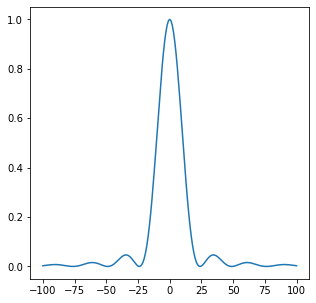

Отношение ширины центрального пика интенсивности к ширине щели: 12500.0


In [10]:
N = 20
A = np.ones(N)
Lambda = 5e-4

R = np.zeros([3, N])
print(R.shape)
R[2, ] = np.linspace(-0.002, 0.002, N)

Np = 201
z_min = -100
z_max = 100

z = np.linspace(z_min, z_max, Np)
L = 200
Nb = 10
I  = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    I[i] = Intensity1(Lambda, N, A, R, r, Nb)
    
I_max = np.amax(I)

fig, ax = plt.subplots(figsize=[5, 5])
ax.plot(z, I/I_max)
plt.show()

max_width = 50 #по графику
gap_width = 0.004
print(f"Отношение ширины центрального пика интенсивности к ширине щели: {max_width / gap_width}")

#### При увеличении N, ширина центрального пика увеличивается (до предельного значения ~55)
#### x_min = lambda * L / d - положения первого минимума, где d - ширина щели

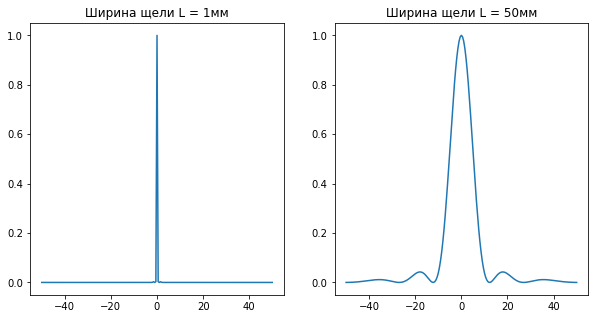

In [11]:
N = 20
A = np.ones(N)
Lambda = 5e-4

R = np.zeros([3, N])
R[2, ] = np.linspace(-0.001, 0.001, N)

Np = 201
z_min = -50
z_max = 50

z = np.linspace(z_min, z_max, Np)

L = 200
L1 = 1    
L2 = 50
Nb = 3

I1 = np.zeros(Np, dtype=np.float64)
I2 = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    r1 = np.array([0, L1, z[i]]).T
    r2 = np.array([0, L2, z[i]]).T
    I[i] = Intensity1(Lambda, N, A, R, r1, Nb)
    I1[i] = Intensity1(Lambda, N, A, R, r1, Nb)
    I2[i] = Intensity1(Lambda, N, A, R, r2, Nb)
    
I1_max = np.amax(I1)
I2_max = np.amax(I2)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=[10, 5])
ax[0].plot(z, I1/I1_max)
ax[0].set_title("Ширина щели L = 1мм")
ax[1].plot(z, I2/I2_max)
ax[1].set_title("Ширина щели L = 50мм")
plt.show()


### Задание:
#### Исследуйте распределение интенсивности света при интерференции на системе двух щелей, используя модель щели конечной ширины. Для этого замените каждую из щелей $20$ точечными источниками, отстоящими друг от друга на $10^{−4}$ мм, расстояния между серединами щелей задайте равными $0.1$ мм. Как соотносится распределение интенсивности в данной модели с аналогичными распределениями для двух точечных щелей? Как зависит распределение интенсивности от длины волны?

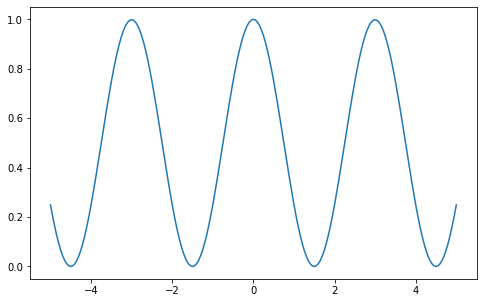

In [69]:
N = 20
A = np.ones(2 * N)
Lambda = 5e-4


R1 = np.zeros([3, N])
R2 = np.zeros([3, N])
R1[2, ] = np.arange(-0.051, -0.049, 0.0001)
R2[2, ] = np.arange(0.049, 0.051, 0.0001)
R = np.concatenate((R1, R2), axis=1)

Np = 201
z_min = -5
z_max = 5

z = np.linspace(z_min, z_max, Np)
L = 600
Nb = 5
I  = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    I[i] = Intensity1(Lambda, 2 * N, A, R, r, Nb)
    
I_max = np.amax(I)

fig, ax = plt.subplots(figsize=[8, 5])
ax.plot(z, I/I_max)
plt.show()


### ГЕОМЕТРИЧЕСКАЯ ОПТИКА
В общем случае для описания процесса распространения волн необходимо решить волновое уравнение, являющееся дифференциальным уравнением в частных производных, с заданными начальными и граничными условиями. Методы ее решения, изучаемые в специальном разделе математики, который называется "Уравнения математической физики", в большинстве случаев оказываются весьма сложными. Однако существует важный частный случай, когда длина волны много меньше всех характерных размеров системы. В этом случае оказывается возможным использовать модель, в которой волна распространяется аналогично движению пучка частиц, движущихся по определенным траекториям-лучам, поэтому данное приближения получило название геометрической оптики. Распространение световых лучей подчиняется принципу Ферма (принцип наименьшего времени): **луч света идет между двумя точками по такому пути, который требует наименьшего времени**.

Применим принцип Ферма к задаче преломления, в которой свет падает на поверхность раздела двух сред, в которых скорость света различна *(рис. 14)*.

<img src="images/ferma.png"/>

**Рис. 14. К иллюстрации принципа Ферма**

Принято выражать скорость света в среде $v$ через скорость света в вакууме $c$ и показатель преломления среды $n$

$$\tag{22} v = \frac{c}{n}$$

Время прохождения света из точки *А* в точку *В*, как видно из *рис. 14*, равно

$$\tag{23} t = \frac{\sqrt{a^2 + x^2}}{v_1} + \frac{\sqrt{b^2 + (L-x)^2}}{v_2}$$

где $v_1 = c/n-1,\ v_2 = c/n_2$.
В соответствии с принципом Ферма $dx/dt$, поэтому

$$\tag{24} \frac{1}{v_1}\frac{x}{\sqrt{a^2 + x^2}} - \frac{1}{v_2}\frac{L-x}{\sqrt{b^2 + (L-x)^2}} = 0$$

Так как $x/\sqrt{a^2 + x^2} = sin α,\ (L − x)/\sqrt{b^2 + (L − x)^2} = sin β$, то *(24)* можно записать в следующем виде (закон Снелла):

$$\tag{25} n_1 sin α = n_2 sin β.$$

Рассмотрим задачу о распространении луча в среде с неоднородным коэффициентом преломления. Будем считать, что луч падает на прозрачную среду с коэффициентом преломления $n$, зависящим от $y\ (n = n(y))$, под малым углом к нормали в точке $y = 0$ *(рис. 15)*.

<img src="images/ray_traj.png"/>

**Рис. 15. Траектория луча, падающего нормально на полупространство с неравномерным коэффициентом преломления**

Для нахождения уравнения, описывающего форму луча, рассмотрим луч света, проходящий через несколько плоскопараллельных пластинок с различными коэффициентами преломления *(рис. 16)*. В соответствии с законом Снелла *(25)*

$$\tag{26} n_0 sin α = n_1 sin β_1 = n_2 sin β_2 = n_3 sin β_3 = . . .$$

<img src="images/diff_n.png"/>

**Рис. 16. Графическая иллюстрация выражения (26)**

Так как соотношение *(26)* не зависит от числа и ширины отдельных слоев, оно будет справедливо и при непрерывном изменении коэффициента преломления в направлении оси *OY*:

$$\tag{27} n (y) sin β (y) = n_0 sin α,$$

где $β(y)$-угол между направлением луча и осью $OY$ *(рис. 17)*.

<img src="images/heter_env.png"/>

**Рис. 17. К получению уравнения, описывающего распространение луча в неоднородной среде**

Как видно из *рис. 17*, 

$$tgα (y) = ctgβ (y) = \frac{dy}{dx},$$

поэтому

$$\tag{28} sin\beta(y) = \frac{1}{\sqrt{1+ctg^2\beta(y)}} = \frac{1}{\sqrt{1+dy/dx}^2}$$

Подставляя *(27)* в *(28)* и учитывая, что $α \approx π/2$, приводим *(28)* к виду

$$\tag{29} \frac{n(y)}{\sqrt{1+(dy/dx)^2}}=n_0$$

Решив *(29)* относительно $dx/dy$, получим дифференциальное уравнение первого
порядка с разделяющимися переменными

$$\tag{30} \frac{dy}{dx} = \sqrt{\Bigg(\frac{n(y)}{n_0}\Bigg)^2 - 1}.$$

Его решение имеет вид

$$\tag{31} x = \int_{y_0}^y\frac{dy}{\sqrt{\Bigg(\frac{n(y)}{n_0}\Bigg)^2 - 1}}.$$

При произвольной зависимости $n(y)$, вообще говоря, интеграл в *(31)* может не выражаться через элементарные функции, поэтому для анализа траектории движения луча будем вычислять его численно. Для этого можно использовать следующий алгоритм:

- Задать функцию $n(y)$.
- Задать координату точки падения $y_0$.
- Задать координату точки падения $y_{max}$.
- Вычислить координаты $y_i, i = 0, 1, . . . ,N −1$, точек разбиения отрезка $[y0, ymax]$ на $N$ частей.
- Вычислить N значений интеграла (9.85) на интервалах $[y0, yi]$.
- Отобразить графически зависимость $y = y(x)$.

Для реализации данного алгоритма необходимо выполнить следующую последовательность действий:

- Создать функцию **CoeffRefraction**, содержащий описание функции, возвращающей значение функции $n(y)/n_0$, где $n_0$ - коэффициент преломления в точке падения луча.

In [13]:
def CoeffRefraction(y):
    return (1+4*y)**0.5

- Выполнить следующую последовательность команд:

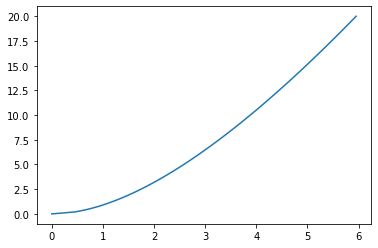

In [14]:
y_min = 1e-5
y_max = 20
Np = 100

y = []

for i in range(Np):
    y.append(y_min + (y_max - y_min)/(Np-1)*(i))
    
Nk = 1000

Y = np.zeros(Nk, dtype=np.float64)
Z = np.zeros(Nk, dtype=np.float64)

Xb = np.zeros(Np, dtype=np.float64)
Yb = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    for k in range(Nk):
        Y[k] = y_min + (y[i] - y_min)/(Nk -1)*(k)
        Z[k] = 1/((CoeffRefraction(Y[k])**2-1)**0.5)
        
    Xb[i] = np.trapz(Z, Y)
    Yb[i] = Y[Nk-1]
    
fig12 = plt.figure()
ax12 = fig12.add_subplot(111)
p12 = ax12.plot(Xb, Yb)

**Рис. 18. Траектория движения луча в среде с переменным коэффициентом преломления**

Результат выполнения описанной выше последовательности команд представлен на *рис. 18*.

Полученный результат выглядит достаточно неожиданно. Можно было ожидать,
что луч, падающий на границу раздела, должен идти вдоль оси *OX*, но не по искривленной траектории. Полученный результат требует дополнительного объяснения. В геометрической оптике под лучом понимается узкий пучок света, который с некоторым приближением можно считать участком фронта плоской волны (принцип Гюйгенса).

<img src="images/curved_ray.png"/>


**Рис. 19. К объяснению причины искажения луча при движении волны в среде с неоднородным коэффициентом преломления**

При падении плоской волны на оптическую неоднородность во второй среде возбуждаются вторичные волны *(рис. 19)*. Вторичная волна движется в среде с неоднородным показателем преломления с различными скоростями: тем медленнее, чем больше $n$, и наоборот. Это приводит к искажению фронта вторичных волн.

Таким образом, лучи, рассматриваемые в геометрической оптике, представляют собой пример математической модели, используемой для описания ряда оптических явлений. Важно понимать, что в реальной природе "лучей" не существует. При невозможности решения задачи с точки зрения геометрической оптики, следует представить луч как перпендикуляр к участку фронта плоской волны, ширина которого значительно больше длины волны, и рассмотреть явление с точки зрения геометрической оптики.

### Задание:
#### Используя описанный выше документ, проведите сравнительный анализ траекторий луча для различных законов изменения коэффициента преломления $f (y) = (1 + ay^α)^β$. Почему в ряде случаев вычисление численного значения интеграла ***(31)*** оказывается невозможным, но при использовании в качестве нижней границы интегрирования некоторой величины $ϵ ≪ 1$ интеграл оказывается сходящимся?

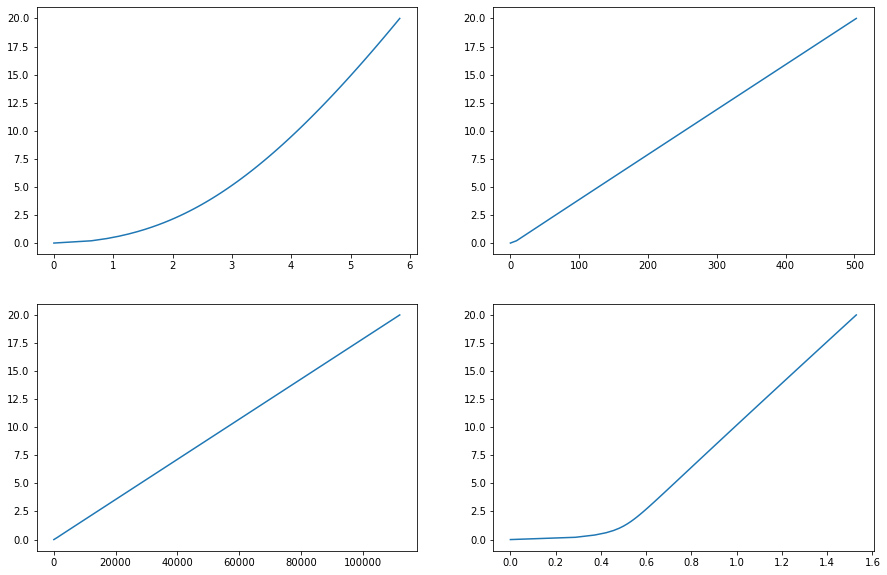

In [15]:
def CoeffRefraction(y, a1, a2, a3):
    return (1+(a1*y)**a2)**a3

y_min = 1e-5
y_max = 20
Np = 100

y = []

for i in range(Np):
    y.append(y_min + (y_max - y_min)/(Np-1)*(i))
    
Nk = 1000

Y = np.zeros(Nk, dtype=np.float64)

Z1 = np.zeros(Nk, dtype=np.float64)
Z2 = np.zeros(Nk, dtype=np.float64)
Z3 = np.zeros(Nk, dtype=np.float64)
Z4 = np.zeros(Nk, dtype=np.float64)

Xb1 = np.zeros(Np, dtype=np.float64)
Xb2 = np.zeros(Np, dtype=np.float64)
Xb3 = np.zeros(Np, dtype=np.float64)
Xb4 = np.zeros(Np, dtype=np.float64)

Yb = np.zeros(Np, dtype=np.float64)
for i in range(Np):
    for k in range(Nk):
        Y[k] = y_min + (y[i] - y_min)/(Nk -1)*(k)
        Z1[k] = 1/((CoeffRefraction(Y[k], 1, 1, 1)**2-1)**0.5)
        Z2[k] = 1/((CoeffRefraction(Y[k], 1, 2, 2)**2-1)**0.5)
        Z3[k] = 1/((CoeffRefraction(Y[k], 2, 3, 0.5)**2-1)**0.5)
        Z4[k] = 1/((CoeffRefraction(Y[k], 1, 1, 4)**2-1)**0.5)
        
    Xb1[i] = np.trapz(Z1, Y)
    Xb2[i] = np.trapz(Z2, Y)
    Xb3[i] = np.trapz(Z3, Y)
    Xb4[i] = np.trapz(Z4, Y)
    Yb[i] = Y[Nk - 1]
    
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[15, 10])
ax[0, 0].plot(Xb1, Yb)
ax[0, 1].plot(Xb2, Yb)
ax[1, 0].plot(Xb3, Yb)
ax[1, 1].plot(Xb4, Yb)
plt.show()